In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# inicio, fin y saltos
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

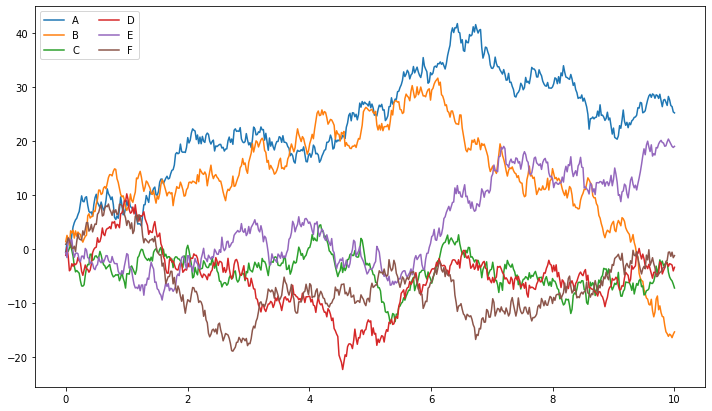

In [13]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [14]:
import requests # pull data from the web
import pandas as pd

In [15]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [16]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2020-10-17 15:39:41.556509')

In [17]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [18]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

## Bitcoin

In [19]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-17 16:00:00,11362.73,11415.48,11326.85,11340.12,93.031350,1.057555e+06
2020-10-17 17:00:00,11337.40,11350.00,11307.75,11328.03,52.997742,6.001964e+05
2020-10-17 18:00:00,11322.81,11350.00,11317.41,11344.71,36.023854,4.083862e+05
2020-10-17 19:00:00,11350.00,11356.82,11336.72,11349.63,11.283904,1.280577e+05
2020-10-17 20:00:00,11349.63,11367.42,11337.85,11342.91,12.916535,1.466193e+05


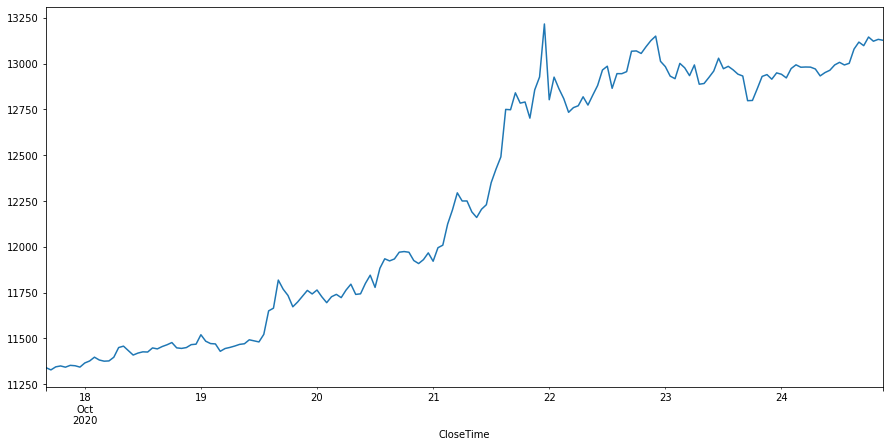

In [21]:
btc['ClosePrice'].plot(figsize=(15, 7));

## Ether

In [22]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2020-10-17 16:00:00,369.41,370.65,367.85,367.98,569.836921,210378.031799
2020-10-17 17:00:00,367.56,367.56,365.92,366.47,269.999034,98991.265146
2020-10-17 18:00:00,366.55,367.17,366.40,366.94,136.141135,49946.449649
2020-10-17 19:00:00,366.90,367.28,366.64,367.20,271.374776,99614.993080
2020-10-17 20:00:00,367.19,367.50,366.60,366.66,317.318993,116524.238325


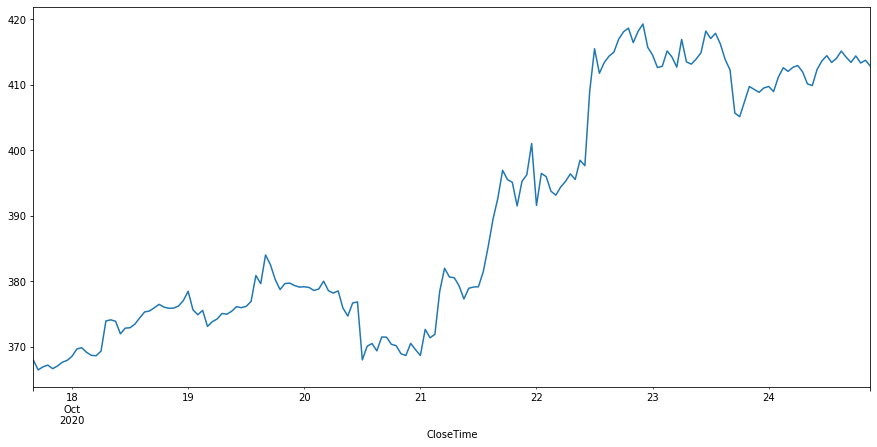

In [24]:
eth['ClosePrice'].plot(figsize=(15, 7));

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Bonus: Dynamic plots with Bokeh

We've also included [Bokeh](https://bokeh.pydata.org/) as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [25]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

## Interactive plot

In [26]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

<h1>Exporting to excel</h1>

In [27]:
writer = pd.ExcelWriter('cryptos.xlsx')

<p> We'll now wrote both our Bitcoin and Ether data as separate sheets:</p>

In [29]:
btc.to_excel(writer, sheet_name ='Bitcoin')

In [30]:
eth.to_excel(writer, sheet_name ='Ether')

<p>We save the file</p>

In [31]:
writer.save()